In [1]:
# Librerías manejo de datos
import numpy as np
import pandas as pd

# Librerías de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos y ETL

Vamos a cargar un dataset sobre el peso de los niños al nacer.


In [2]:
birth_weight = pd.read_csv('birthweight.csv')

In [3]:
birth_weight.head()

,id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
0,1313,12,17,5.8,33,0,24,0,58,99,26,16,0,66,1,0,Low
1,431,12,19,4.2,33,1,20,7,63,109,20,10,35,71,1,0,Low
2,808,13,19,6.4,34,0,26,0,65,140,25,12,25,69,0,0,Normal
3,300,12,18,4.5,35,1,41,7,65,125,37,14,25,68,1,1,Low
4,516,13,18,5.8,35,1,20,35,67,125,23,12,50,73,1,0,Low


In [4]:
birth_weight["Birthweight_kg"]=birth_weight["Birthweight"]*0.453592

### Media

\\[ \mu_{x} = E[x] =  \frac{1}{N} \sum _{i=1}^N x_i\\]

Rellenar con formula y texto

In [5]:
def mean(vector):
    m = 0
    for val in vector:
        m = val+m
    m = m/len(vector)
    return m
mean(birth_weight["Birthweight_kg"])

3.2950218857142866

In [6]:
np.mean(birth_weight["Birthweight_kg"])

3.295021885714286

### Varianza

Es la esperanza del cuadrado de la desviación de dicha variable respecto a su media. Otra definición es la media de los residuos al cuadrado.

Su formula es:

\\[ Var[x] =  \frac{1}{N} \sum _{i=1}^N \left( x_i-\bar{x} \right)^2 \\]

Pero como no sabremos $\bar{x}$ sino que siempre tendremoso que estimar la media E[x] la formula del estimador insesgado de la varianza para una muestra de la población es:

\\[ Var[x] =  \frac{1}{N-1} \sum _{i=1}^N \left( x_i-E[x] \right)^2 \\]


In [7]:
def var(vector):
    m = mean(vector)
    v = 0
    for val in vector:
        v = (val-m)**2 + v
    v = v/(len(vector)-1)
    return v
var(birth_weight["Birthweight_kg"])

0.363800698111214

In [8]:
np.var(birth_weight["Birthweight_kg"],ddof=1)

0.36380069811121396

### Mediana

La mediana es el valor de una distribución tal que la mitad de los elementos son superiores y la mitad son inferiores.

In [9]:
def median(vector: pd.Series) -> float:
    vector = vector.sort_values()
    idx=(len(vector)-1)/2
    if idx==int(idx):
        return vector.iloc[int(idx)]
    else:
        return (vector.iloc[int(np.floor(idx))]+vector.iloc[int(np.ceil(idx))])/2
    
print(median(pd.Series([1,2,3,3.5,4,6])))
print(median(pd.Series([1,2,3,4,6])))


3.25
3


In [10]:
median(birth_weight["Birthweight_kg"])

3.288542

In [11]:
np.median(birth_weight["Birthweight_kg"])

3.288542

### Cuantiles

Los cuantiles suelen usarse por grupos que dividen la distribución en partes iguales; entendidas estas como intervalos que comprenden la misma proporción de valores. Los más usados son:

* Los cuartiles, que dividen a la distribución en cuatro partes (corresponden a los cuantiles 0,25; 0,50 y 0,75);
* Los quintiles, que dividen a la distribución en cinco partes (corresponden a los cuantiles 0,20; 0,40; 0,60 y 0,80);
* Los deciles, que dividen a la distribución en diez partes;
* Los percentiles, que dividen a la distribución en cien partes.


In [12]:
np.quantile(birth_weight["Birthweight_kg"],[0.25,0.5,0.75])

array([2.9256684, 3.288542 , 3.628736 ])

### Boxplot

<AxesSubplot:xlabel='Birthweight_kg'>

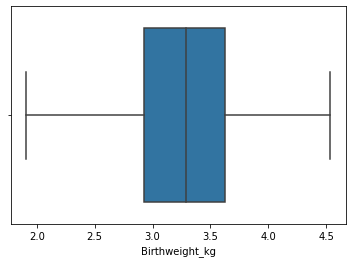

In [13]:
sns.boxplot(x=birth_weight["Birthweight_kg"])

### Histograma

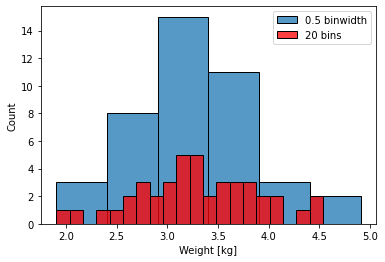

In [14]:
sns.histplot(birth_weight["Birthweight_kg"], binwidth=0.5,label="0.5 binwidth")
sns.histplot(birth_weight["Birthweight_kg"], bins=20,color="red",label="20 bins")
plt.xlabel("Weight [kg]")
plt.legend()

### Curva de densidad (kernel density estimation)

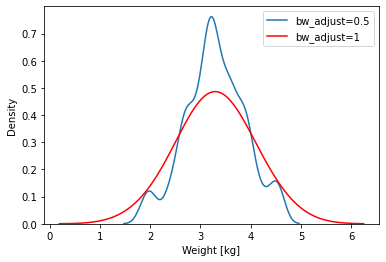

In [15]:
sns.kdeplot(birth_weight["Birthweight_kg"], bw_adjust=0.5,label="bw_adjust=0.5")
sns.kdeplot(birth_weight["Birthweight_kg"], bw_adjust=2,color="red",label="bw_adjust=1")
plt.xlabel("Weight [kg]")
plt.legend()

### Violin plot

<AxesSubplot:xlabel='Birthweight_kg'>

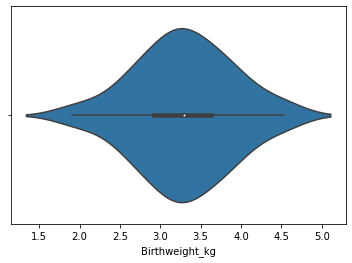

In [16]:
sns.violinplot(data=birth_weight,x="Birthweight_kg")

# Tests estadísticos

¿Es la media de estas dos poblaciones iguales?

In [17]:
weight_NO_smoke = birth_weight.loc[birth_weight["smoker"]==0,"Birthweight_kg"]
weight_YES_smoke = birth_weight.loc[birth_weight["smoker"]==1,"Birthweight_kg"]

In [18]:
weight_NO_smoke.describe()

count    20.000000
mean      3.488122
std       0.520701
min       2.630834
25%       3.118445
50%       3.356581
75%       3.900891
max       4.535920
Name: Birthweight_kg, dtype: float64

In [19]:
weight_YES_smoke.describe()

count    22.000000
mean      3.119476
std       0.630217
min       1.905086
25%       2.721552
50%       3.175144
75%       3.526678
max       4.535920
Name: Birthweight_kg, dtype: float64

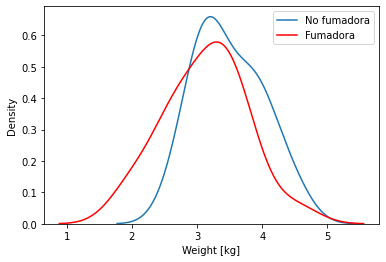

In [20]:
sns.kdeplot(weight_NO_smoke,label="No fumadora")
sns.kdeplot(weight_YES_smoke,color="red",label="Fumadora")
plt.xlabel("Weight [kg]")
plt.legend()

In [21]:
diff_NO_YES=np.mean(weight_NO_smoke.values)-np.mean(weight_YES_smoke.values)
diff_YES_NO=np.mean(weight_YES_smoke.values)-np.mean(weight_NO_smoke.values)
print(f"La diferencia de medias NO_smoker-YES_smoker es:{np.round(diff_NO_YES,2)}")
print(f"La diferencia de medias YES_smoker-NO_smoker es:{np.round(diff_YES_NO,2)}")

La diferencia de medias NO_smoker-YES_smoker es:0.37
La diferencia de medias YES_smoker-NO_smoker es:-0.37


¿Cómo de probable es que estos cambios hayan ocurrido al azar?

In [22]:

X1=weight_NO_smoke
X2=weight_YES_smoke

def perm_func(X1: pd.Series, X2:pd.Series) -> (pd.Series,pd.Series): 
    X = X1.append(X2).reset_index(drop=True)

    X1_reorder=X.sample(frac=0.5)
    X2_reorder=X.drop(X1_reorder.index)
    return (X1_reorder.reset_index(drop=True),X2_reorder.reset_index(drop=True))

X1_reorder, X2_reorder= perm_func(weight_NO_smoke,weight_YES_smoke)

In [23]:
mean_values = []
num_mean_X1_larger_X2 = 0
num_mean_X2_larger_X1 = 0

total_trials = 10000
for i in range(total_trials):
    X1_reorder, X2_reorder= perm_func(weight_NO_smoke,weight_YES_smoke)
    
    mean_diff = np.mean(X1_reorder.values) - np.mean(X2_reorder.values)
    mean_values.append(mean_diff)
    
    if mean_diff>diff_NO_YES:
        num_mean_X1_larger_X2 += 1
    
    if mean_diff<diff_YES_NO:
        num_mean_X2_larger_X1 += 1
    


In [24]:
print(f"""La probabilidad por puro azar la media de X1 menos X2 sea mayor que la diferencia original: 
    {np.round(num_mean_X1_larger_X2/total_trials*100,2)}%""")

print(f"""La probabilidad por puro azar la media de X1 menos X2 sea menor que la diferencia original: 
    {np.round(num_mean_X2_larger_X1/total_trials*100,2)}%""")

print(f"""La probabilidad de que por puro azar los valores de NO_smoker y YES_smoker se hayan reordenado
para dar diferencias tan grandes es:{np.round((num_mean_X2_larger_X1+num_mean_X1_larger_X2)/total_trials*100,2)}%""")

La probabilidad por puro azar la media de X1 menos X2 sea mayor que la diferencia original: 
    2.22%
La probabilidad por puro azar la media de X1 menos X2 sea menor que la diferencia original: 
    2.27%
La probabilidad de que por puro azar los valores de NO_smoker y YES_smoker se hayan reordenado
para dar diferencias tan grandes es:4.49%


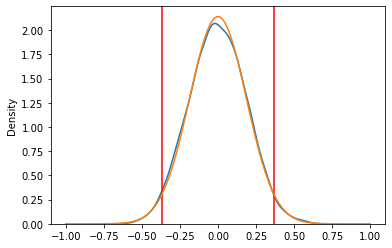

In [32]:
from scipy.stats import norm

#sns.displot(mean_values)
sns.kdeplot(mean_values)
plt.axvline(diff_NO_YES, 0,2,color="#FF0000")
plt.axvline(diff_YES_NO, 0,2,color="#FF0000")
x=np.linspace(-1, 1, 100)
plt.plot( x, norm.pdf(x, 0, np.std(mean_values,ddof=1)))


In [33]:
np.var(mean_values)

0.034686190800655804

Vemos que la probabilidad de que esos datos se hayan conseguido por puro hazar es muy baja, inferior al 5%-

### T-student

El t-test es usado cuando tienes dos grupos de datos y quieres saber si la media de ambos grupos es igual o no. Tenemos dos hipótesis:
\\[H_0 : \mu(X) = \mu(Y) \\]
\\[H_1 : \mu(X) \ne \mu(Y) \\]

Empezamos con las siguientes suposiciones:
1. Las muestras han sido seleccionas por muestreo aleatorio simple dentro de la población.
2. Las poblaciones siguen una distribución normal. (sino usar test Wilcoxon-Mann-Whitney)
3. Ambas poblaciones tienen la misma varianza. (sino usar test Welch)
4. Las poblaciones no están correladas. (sino usar t-test emparejado)

Primero calculamos la media y varianza de ambos grupos. El test para verificar si la hipótesis nula $H_0$ es cierta puede ser calculado como sigue:

\\[ t=\frac{E[X]-E[Y]}{s_p·\sqrt{\frac{1}{n_x}+\frac{1}{n_y}}} \\]

Donde $s_p$ es la desviación estandar compuesta, calculada como:

\\[ s^2_p=\frac{(n_x-1)Var[X]+(n_y-1)Var[Y]}{n_x+n_y-2} \\]

Donde $n_x$ y $n_y$ son los números de muestras en cada uno de los grupos muestreados. El número de grados de libertad es 
$d.f.=n_x+n_y-2$. Podemos asumir que las dos varianzas son iguales si ambas pasan el test de varianza de Fisher(F-test).


In [34]:
from scipy import stats
t, p = stats.ttest_ind(weight_NO_smoke,weight_YES_smoke)
p


0.046502721823500064

# Regresiones lineales

In [35]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(birth_weight,test_size=0.33, random_state=42)

In [36]:
from statsmodels.formula.api import ols

In [37]:
train.head()

,id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight,Birthweight_kg
15,1600,13,21,6.3,39,0,19,0,64,125,23,14,2,76,0,0,Normal,2.857630
33,27,14,20,7.8,41,1,37,25,63,145,46,16,0,68,0,1,Normal,3.538018
16,57,14,20,7.3,39,1,23,17,62,104,32,12,25,66,0,0,Normal,3.311222
36,1764,15,22,10.0,41,1,32,12,68,154,38,14,25,71,0,0,Normal,4.535920
35,1388,13,20,6.9,41,1,22,7,63,117,24,16,12,69,0,0,Normal,3.129785


In [38]:
model = ols(formula='Birthweight_kg ~ mheight + motherage + fheight + fage + mnocig', data=birth_weight)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         Birthweight_kg   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     3.426
Date:                Tue, 03 Nov 2020   Prob (F-statistic):             0.0124
Time:                        08:28:12   Log-Likelihood:                -29.681
No. Observations:                  42   AIC:                             71.36
Df Residuals:                      36   BIC:                             81.79
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.1471      2.838     -1.461      0.1

In [39]:
model = ols(formula='Birthweight_kg ~ mheight +  mnocig', data=birth_weight)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         Birthweight_kg   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     4.362
Date:                Tue, 03 Nov 2020   Prob (F-statistic):             0.0195
Time:                        08:28:13   Log-Likelihood:                -33.616
No. Observations:                  42   AIC:                             73.23
Df Residuals:                      39   BIC:                             78.45
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.7943      2.232     -1.252      0.2